In [6]:
pip install twitchAPI


The following command must be run outside of the IPython shell:

    $ pip install twitchAPI

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [7]:
from twitchAPI.twitch import Twitch
from pprint import pprint

In [8]:
twitch = Twitch('txs58of1olyox4slhk1l7pk70f3iys', 'cz4lwheyynrl8s98k0ypk25aumj577')
pprint(twitch.get_users(logins=['serenegrachay']))

{'data': [{'broadcaster_type': '',
           'created_at': '2018-03-07T22:25:20Z',
           'description': 'Gamer. Guinness World Record Holder. Cat Owner.',
           'display_name': 'SereneGrachay',
           'id': '203571765',
           'login': 'serenegrachay',
           'offline_image_url': '',
           'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/7f0ebcd0-1016-4fa0-b3c3-a088e4751c6f-profile_image-300x300.png',
           'type': '',
           'view_count': 951}]}


In [9]:
import json

In [10]:
following = twitch.get_users_follows(from_id=203571765)


In [11]:
following #Test that it works

{'total': 136,
 'data': [{'from_id': '203571765',
   'from_login': 'serenegrachay',
   'from_name': 'SereneGrachay',
   'to_id': '28822180',
   'to_login': 'darkragaming',
   'to_name': 'DarkRaGaming',
   'followed_at': '2021-09-24T16:19:27Z'},
  {'from_id': '203571765',
   'from_login': 'serenegrachay',
   'from_name': 'SereneGrachay',
   'to_id': '517430904',
   'to_login': 'princesskiraxo',
   'to_name': 'princesskiraxo',
   'followed_at': '2021-09-12T00:04:38Z'},
  {'from_id': '203571765',
   'from_login': 'serenegrachay',
   'from_name': 'SereneGrachay',
   'to_id': '634476243',
   'to_login': 'voiceofkris',
   'to_name': 'VoiceofKris',
   'followed_at': '2021-09-11T23:48:58Z'},
  {'from_id': '203571765',
   'from_login': 'serenegrachay',
   'from_name': 'SereneGrachay',
   'to_id': '119582812',
   'to_login': 'sandybeach_irl',
   'to_name': 'SandyBeach_IRL',
   'followed_at': '2021-09-11T04:09:40Z'},
  {'from_id': '203571765',
   'from_login': 'serenegrachay',
   'from_name': 'Se

# Get Users Follows

## Finished getNodesFollows() by Gladys

The getNodesFollows function recursively get the entire list of a user's follows

In [145]:
#twitch.get_users_follows(from_id=203571765)
def getNodesFollows(twitchGetUserFollows): #accepts a call to twitch api to get the users follows from a certain id
    following_ids = [] #Store all ids
    following = twitchGetUserFollows #put data in a variable
    
    for i in range(len(following["data"])): #Goes through the data on the current page, default to 20
        following_ids.append(following['data'][i]['to_id']) #Appends the user's follows id's
        
        if i == 19 and following['pagination']['cursor'] is not '': #Checks if  there is another page and that we finished current page
            #Merges following_ids array with the array return recursively
            following_ids = following_ids + getNodesFollows(twitch.get_users_follows(after=following['pagination']['cursor'], from_id=203571765))

    return following_ids

In [146]:
following_ids = getNodesFollows(twitch.get_users_follows(from_id=203571765))
#following_ids

# GetNodesFollowers

## Finished getNodesFollowers() by Gladys

In [147]:
#twitch.get_users_follows(to_id=203571765)
def getNodesFollowers(twitchGetUserFollowers): #accepts a call to twitch api to get the users follows from a certain id
    follower_ids = [] #Store all ids
    followers = twitchGetUserFollowers #put data in a variable
    
    for i in range(len(followers["data"])): #Goes through the data on the current page, default to 20
        follower_ids.append(followers['data'][i]['from_id']) #Appends the user's followers id's
        if i == 19 and followers['pagination']['cursor'] is not '': #Checks if  there is another page and that we finished current page
            #Merges following_ids array with the array return recursively
            follower_ids = follower_ids + getNodesFollowers(twitch.get_users_follows(after=followers['pagination']['cursor'],to_id=203571765))

    return follower_ids

In [157]:
followers = getNodesFollowers(twitch.get_users_follows(to_id=203571765))
#followers

### Merge following_ids and followers

In [154]:
all_ids_merge = following_ids + followers
all_ids_set = set(all_ids_merge)
all_ids = list(all_ids_set)
all_ids.insert(0, '203571765')

In [18]:
import numpy as np
import pandas as pd

# Graph Drawing

By Grace

In [20]:
import networkx as nx

In [21]:
import matplotlib.pyplot as plt

In [22]:
graph = nx.DiGraph()

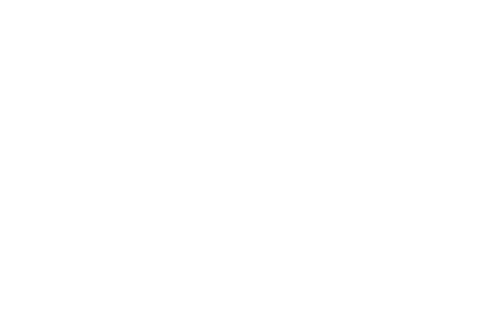

In [24]:
nx.draw(graph, with_labels=True, linewidth=.5)

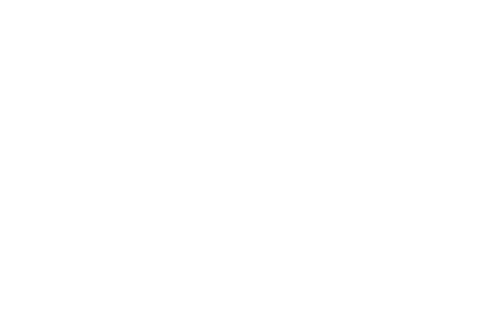

In [25]:
nx.draw(graph, with_labels=True, linewidth=.0001)

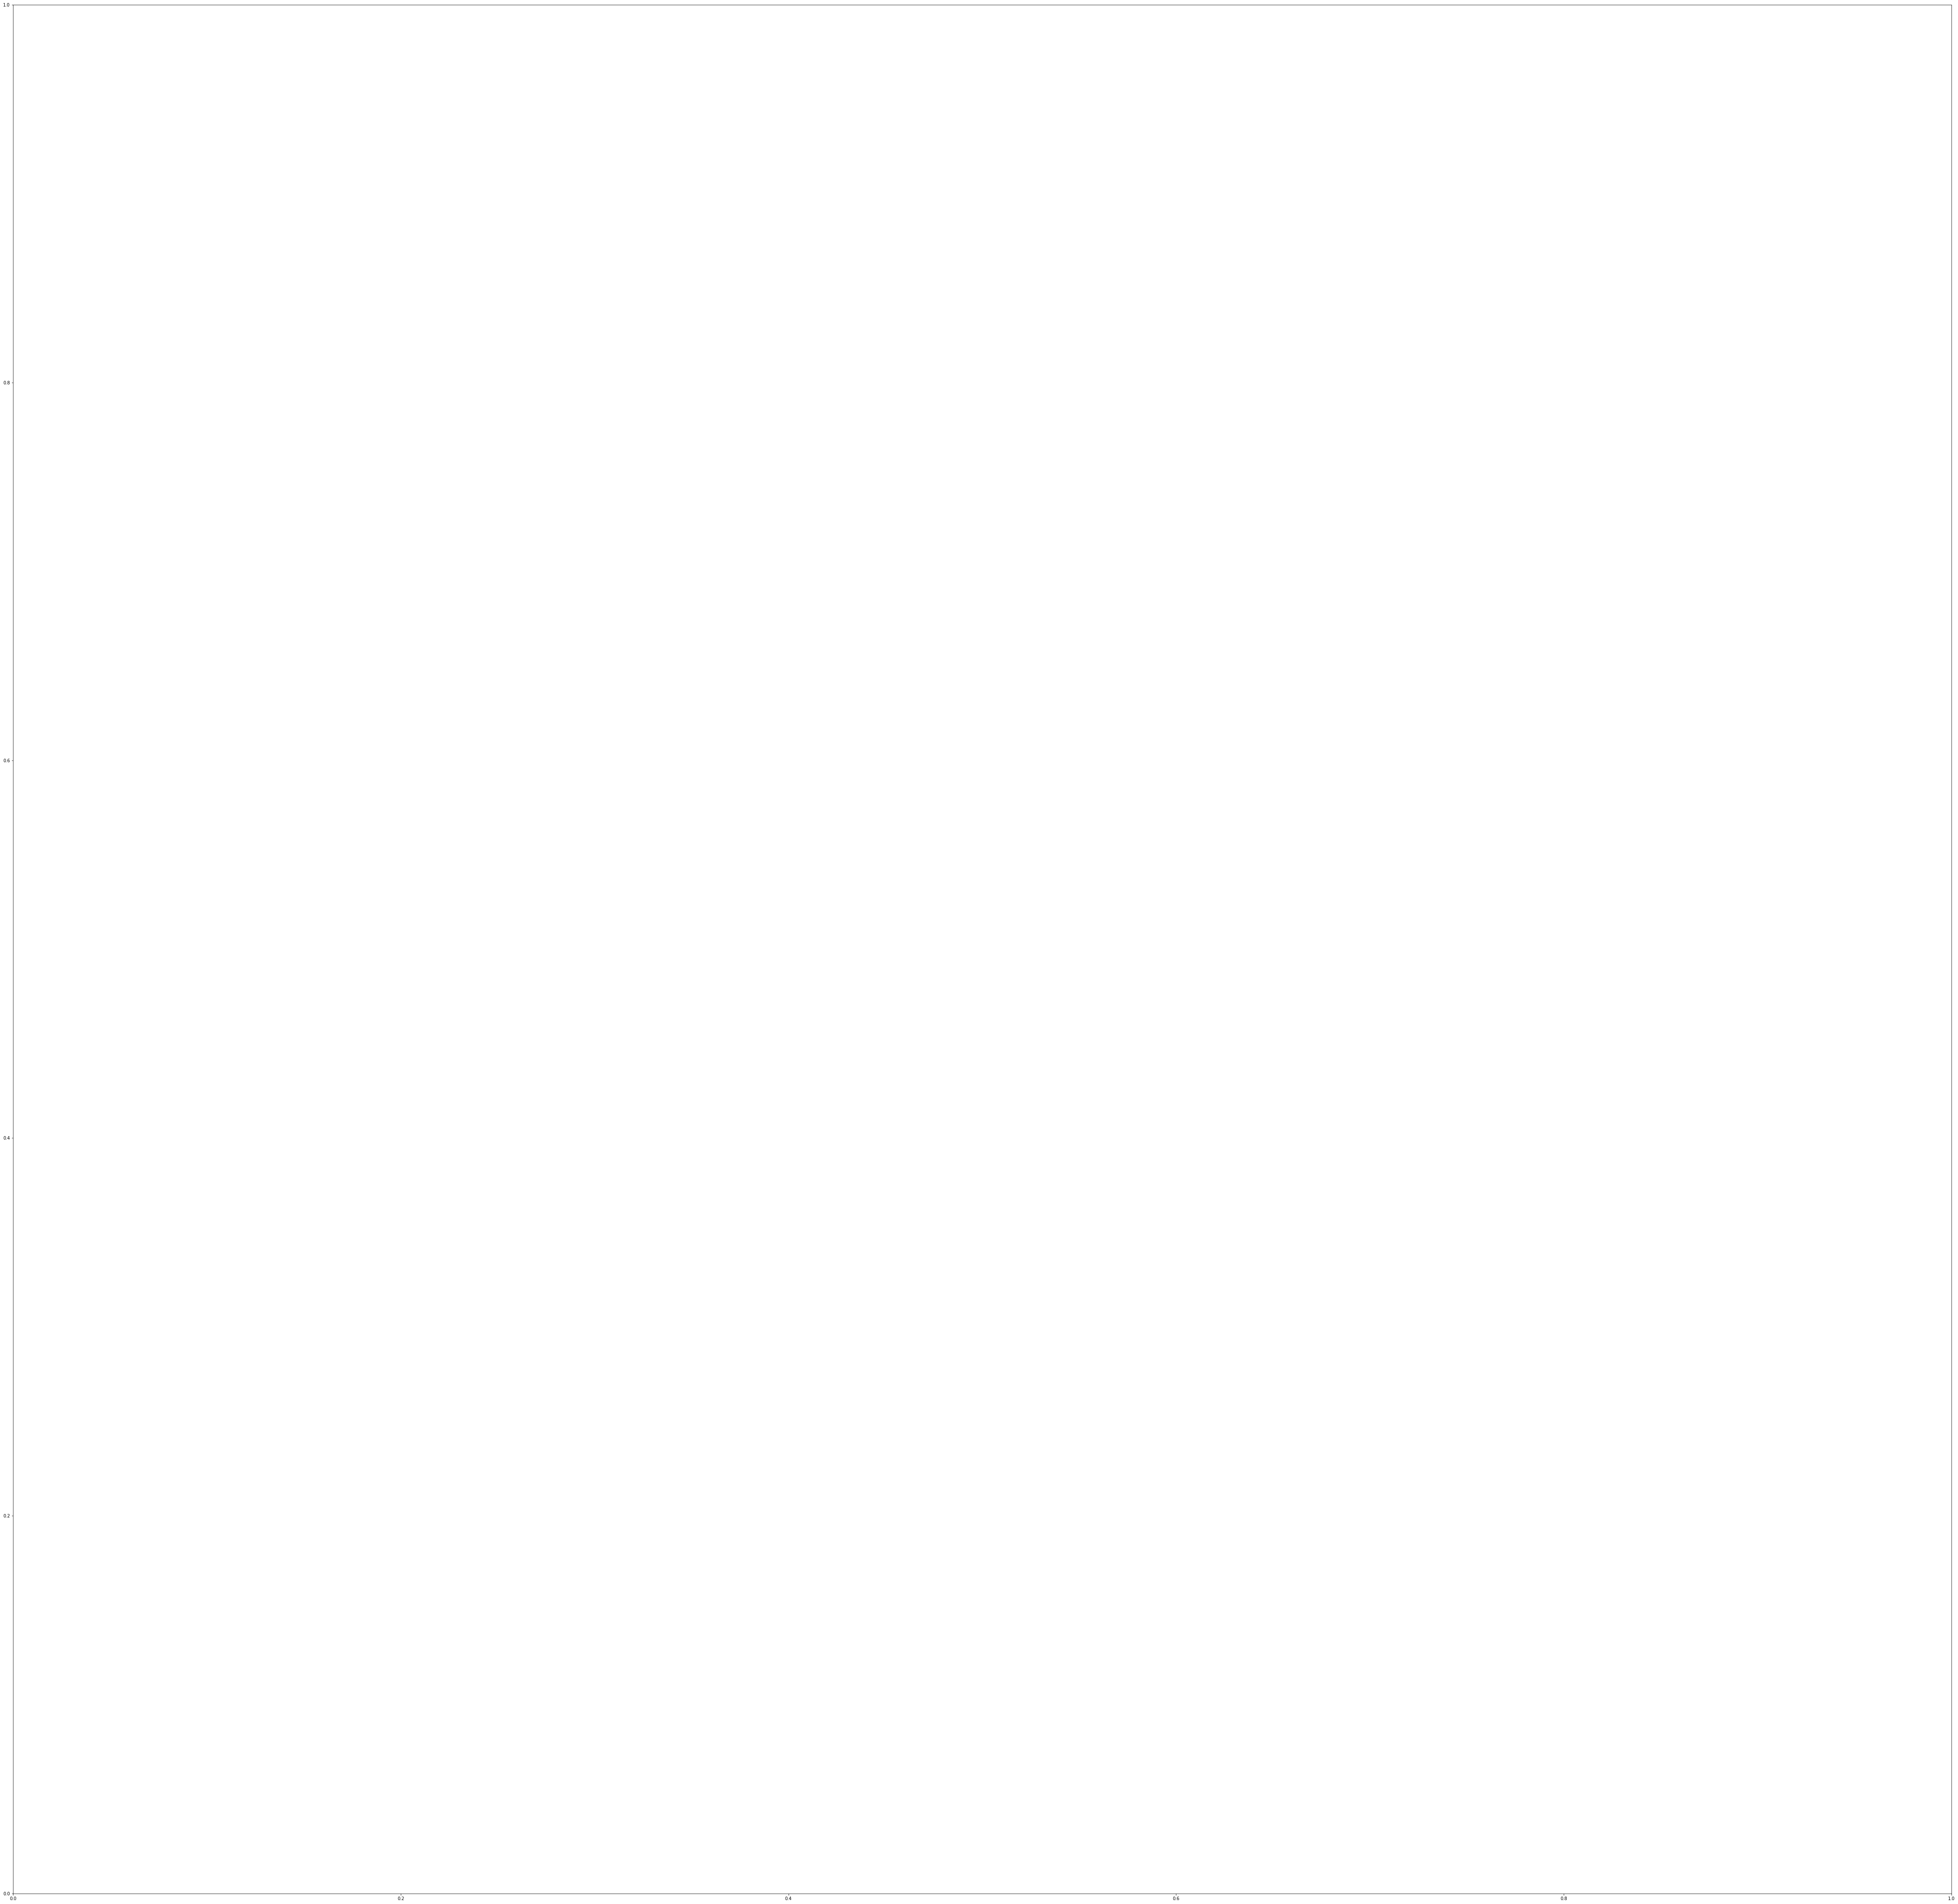

In [26]:
fig = plt.figure("Degree of a random graph", figsize=(80, 80))

pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_size=20)
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=40, font_color='r')
plt.show()

In [28]:
import csv

In [151]:
graph = nx.DiGraph()
not_follow = "{'data': [], 'pagination': {}, 'total': 0}"
for i in range(len(all_ids)):
    for j in range(len(all_ids)):
        
        if (twitch.get_users_follows(from_id=int(all_ids[i]), to_id=int(all_ids[j]))['data']):
            #print(True)
            #pprint(twitch.get_users_follows(from_id=int(all_ids[i]), to_id=int(all_ids[j])))
            graph.add_edges_from([(i, j)])
            with open('graph.csv', 'a', newline='') as csvfile: 
                csvwriter = csv.writer(csvfile) 
                csvwriter.writerow([i, j]) 

KeyboardInterrupt: 

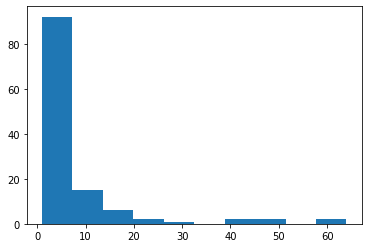

In [134]:
degrees = [graph.degree(n) for n in graph.nodes()]
plt.hist(degrees)
plt.show()

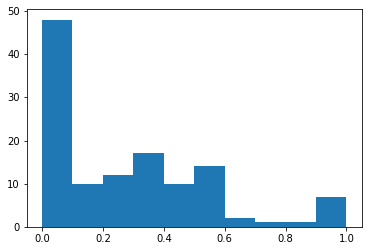

In [135]:
cluster = [nx.clustering(graph, n) for n in graph.nodes()]
plt.hist(cluster)
plt.show()

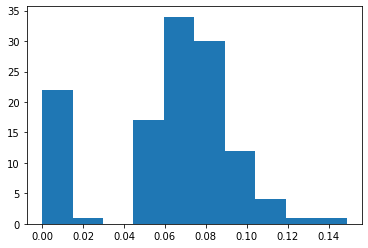

In [136]:
close = [nx.closeness_centrality(graph, n) for n in graph.nodes()]
plt.hist(close)
plt.show()